In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf

w = tf.constant(2.0)
b = tf.constant(3.0)
x = tf.constant(4.0)

#y = tf.multiply(w,x)
#y = tf.add(y,b)

print("Output:",w)
print("Output:",b)
print("Output:",x)

Output: AttributeError: module 'ml_dtypes' has no attribute 'float4_e2m1fn'
tf.Tensor(2.0, shape=(), dtype=float32)
Output: tf.Tensor(3.0, shape=(), dtype=float32)
Output: tf.Tensor(4.0, shape=(), dtype=float32)


In [1]:
import os
import cv2
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [4]:
# Root directory
dataset_dir = "dataset"

base_dir = "dataset"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Check subfolders
print("Train subfolders:", os.listdir(train_dir))
print("Test subfolders:", os.listdir(test_dir))

Train subfolders: ['O', 'R']
Test subfolders: ['O', 'R']


In [4]:
# Collect all image paths from train and test
image_paths = glob(os.path.join(dataset_dir, "*/*/*.jpg"))  # Change *.jpg if needed
    
# Print the total number of images
print(f"Total images in dataset: {len(image_paths)}")


Total images in dataset: 25077


In [5]:
# Resize image to a specific size
def resize_image(image, size=(224, 224)):
    return cv2.resize(image, size)

# Normalize pixel values to range [0, 1]
def normalize_image(image):
    return image / 255.0

# Display an image (for verification)
def show_image(image, title="Image"):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()


In [12]:
def preprocess_and_save_all_images(image_paths, output_base_dir):
    for path in image_paths:
        # Read the image
        image = cv2.imread(path)
        if image is None:  # Handle unreadable images
            print(f"Warning: Unable to read image {path}. Skipping...")
            continue

        # Resize and normalize the image
        resized_image = resize_image(image)
        normalized_image = normalize_image(resized_image)

        # Reconstruct the new save path
        relative_path = os.path.relpath(path, dataset_dir)  # Get relative path
        save_path = os.path.join(output_base_dir, relative_path)  # Add base output directory
        os.makedirs(os.path.dirname(save_path), exist_ok=True)  # Create class-specific folder

        # Save the processed image
        cv2.imwrite(save_path, (normalized_image * 255).astype(np.uint8))


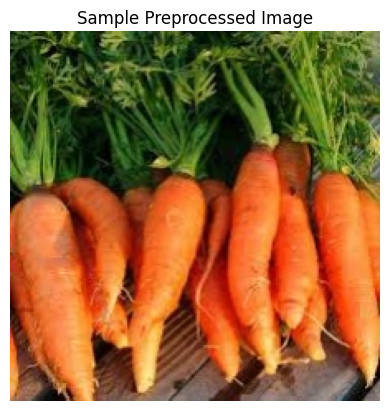

In [18]:
# Display a sample preprocessed image
sample_image_path = glob(os.path.join(output_dir, "**", "*.jpg"), recursive=True)  # Get preprocessed images
if sample_image_path:
    sample_image = cv2.imread(sample_image_path[0])  # Read the first preprocessed image
    show_image(sample_image, title="Sample Preprocessed Image")
else:
    print("No preprocessed images found.")


In [2]:
#pip install librosa


Note: you may need to restart the kernel to use updated packages.


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Model Architecture
model = Sequential()

# Convolutional Layers with Batch Normalization
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(BatchNormalization())  # Normalizing layer
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.6))  # Dropout to prevent overfitting
model.add(Dense(2, activation='softmax'))  # Output layer with two classes (Organic and Recyclable)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Learning rate
    loss='categorical_crossentropy',  # Cross-entropy loss for classification
    metrics=['accuracy']  # Accuracy as evaluation metric
)


C:\Users\Swapnil\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
train_path = './preprocessed/train'  # Directory for training data
test_path = './preprocessed/test'    # Directory for test data


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Augment and normalize training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize images
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Normalize test data
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create the training and testing data generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # For multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [5]:
batch_size = 32  # Adjust based on your system's GPU memory

# Augment and normalize training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Normalize test data
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'  # For multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [6]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Callbacks
callbacks = [
    ModelCheckpoint('best_waste_segregation_model.h5', save_best_only=True, monitor='val_loss', mode='min'),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)  # Reduce learning rate when loss plateaus
]

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,  # Adjust as per your needs
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=callbacks  # Adding callbacks for early stopping and checkpointing
)


C:\Users\Swapnil\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
AttributeError: module 'ml_dtypes' has no attribute 'float4_e2m1fn'
706/706 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7623 - loss: 0.7520   

706/706 ━━━━━━━━━━━━━━━━━━━━ 1283s 2s/step - accuracy: 0.7623 - loss: 0.7517 - val_accuracy: 0.8683 - val_loss: 0.3351 - learning_rate: 1.0000e-04
Epoch 2/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8330 - loss: 0.4026   

706/706 ━━━━━━━━━━━━━━━━━━━━ 1140s 2s/step - accuracy: 0.8330 - loss: 0.4026 - val_accuracy: 0.8747 - val_loss: 0.2872 - learning_rate: 1.0000e-04
Epoch 3/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 1245s 2s/step - accuracy: 0.8394 - loss: 0.3889 - val_accuracy: 0.8727 - val_loss: 0.3331 - learning_rate: 1.0000e-04
Epoch 4/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8525 - loss: 0.3682   

706/706 ━━━━━━━━━━━━━━━━━━━━ 1138s 2s/step - accuracy: 0.8525 - loss: 0.3682 - val_accuracy: 0.8846 - val_loss: 0.2840 - learning_rate: 1.0000e-04
Epoch 5/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 1140s 2s/step - accuracy: 0.8542 - loss: 0.3591 - val_accuracy: 0.8571 - val_loss: 0.3436 - learning_rate: 1.0000e-04
Epoch 6/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 1140s 2s/step - accuracy: 0.8576 - loss: 0.3530 - val_accuracy: 0.8862 - val_loss: 0.3055 - learning_rate: 1.0000e-04
Epoch 7/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8660 - loss: 0.3383   
Epoch 7: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
706/706 ━━━━━━━━━━━━━━━━━━━━ 1145s 2s/step - accuracy: 0.8660 - loss: 0.3383 - val_accuracy: 0.8822 - val_loss: 0.3216 - learning_rate: 1.0000e-04
Epoch 8/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8708 - loss: 0.3272   

706/706 ━━━━━━━━━━━━━━━━━━━━ 1146s 2s/step - accuracy: 0.8708 - loss: 0.3272 - val_accuracy: 0.8942 - val_loss: 0.2751 - learning_rate: 5.0000e-05
Epoch 9/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8815 - loss: 0.3012   

706/706 ━━━━━━━━━━━━━━━━━━━━ 1169s 2s/step - accuracy: 0.8815 - loss: 0.3012 - val_accuracy: 0.9168 - val_loss: 0.2456 - learning_rate: 5.0000e-05
Epoch 10/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 1141s 2s/step - accuracy: 0.8828 - loss: 0.2993 - val_accuracy: 0.8981 - val_loss: 0.2580 - learning_rate: 5.0000e-05


In [7]:
# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 317ms/step - accuracy: 0.9202 - loss: 0.2575
Test Accuracy: 91.68%
Test Loss: 0.2456


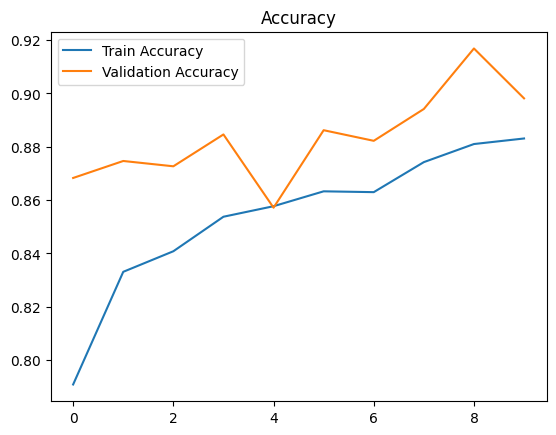

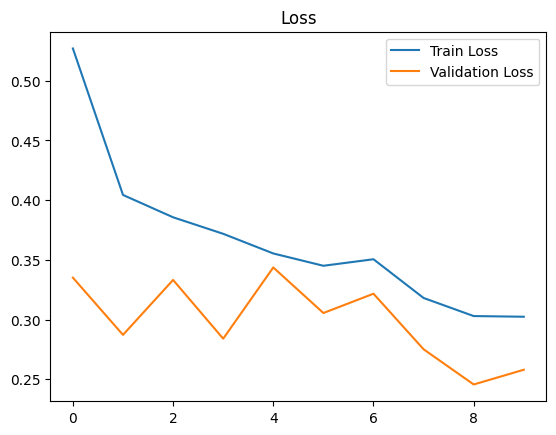

In [8]:
# Plot Accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()


In [9]:
model.save('waste_segregation_model.h5')  # Save the model

In [10]:
import numpy as np
import cv2

def preprocess_image(image_path):
    """Preprocess a single image for prediction."""
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224)) / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def predict_image(image_path, model, class_names):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    print(f"The image is classified as: {class_names[predicted_class]} "
          f"(Confidence: {np.max(prediction)*100:.2f}%)")

# Class names from the train generator
class_names = list(train_generator.class_indices.keys())

# Test predictions with sample images
predict_image('./preprocessed/test/O/O_12573.jpg', model, class_names)
predict_image('./preprocessed/test/R/R_10753.jpg', model, class_names)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
The image is classified as: R (Confidence: 96.00%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
The image is classified as: O (Confidence: 77.24%)


In [23]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [24]:
model.add(Dropout(0.5))  # Already present, try increasing to 0.6

In [25]:
def predict_image(image_path, model, class_names):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224)) / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    prediction = model.predict(img)
    predicted_index = np.argmax(prediction)  # Get predicted class index

    # Ensure index matches class names correctly
    predicted_label = class_names[predicted_index]

    print(f"The image is classified as: {predicted_label} (Confidence: {np.max(prediction)*100:.2f}%)")


In [26]:
print(train_generator.class_indices)

{'O': 0, 'R': 1}


In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

# Load and recompile the model
model = load_model('best_waste_segregation_model.h5')
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [28]:
class_names = list(train_generator.class_indices.keys())  # Ensure correct order

test_images = ['./preprocessed/test/O/O_12573.jpg', './preprocessed/test/R/R_10753.jpg']

for img_path in test_images:
    predict_image(img_path, model, class_names)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
The image is classified as: R (Confidence: 96.00%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
The image is classified as: O (Confidence: 77.24%)


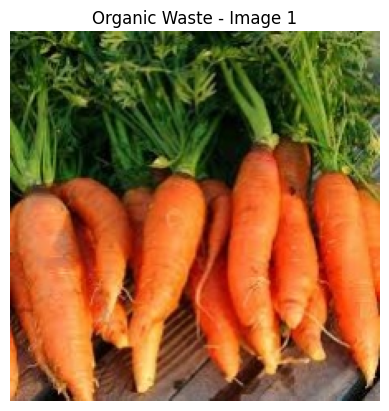

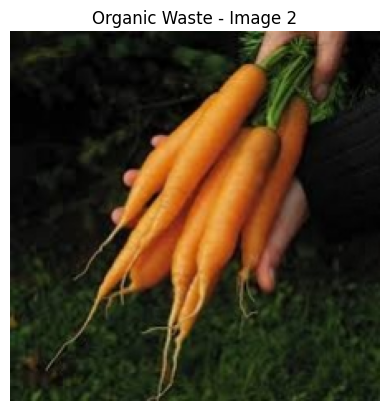

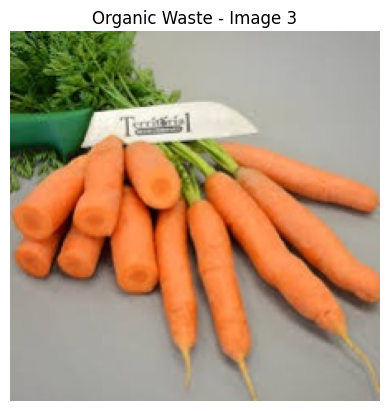

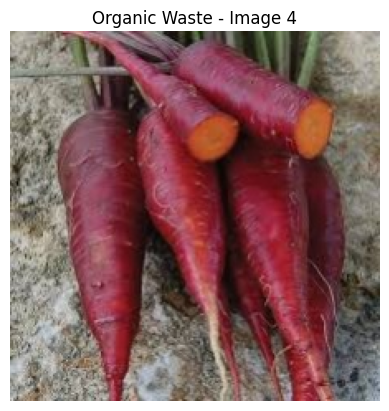

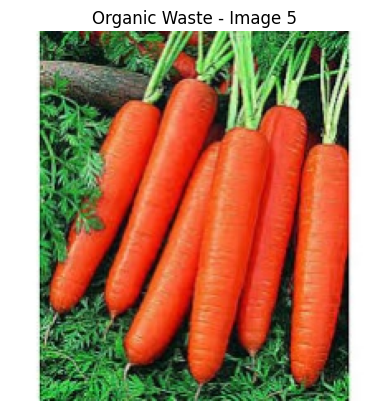

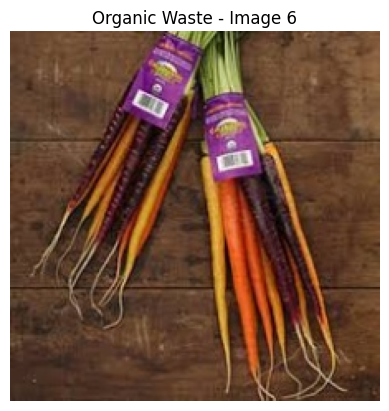

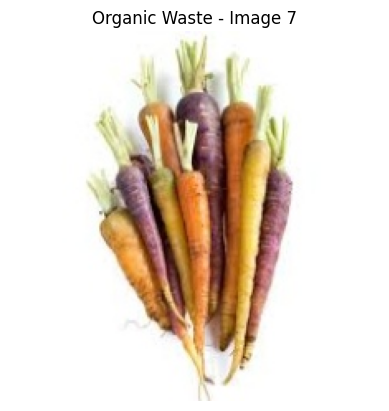

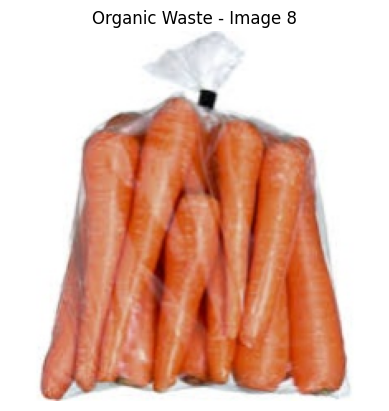

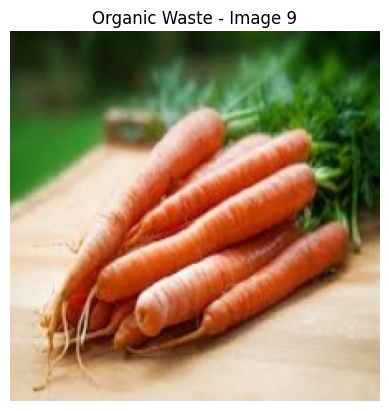

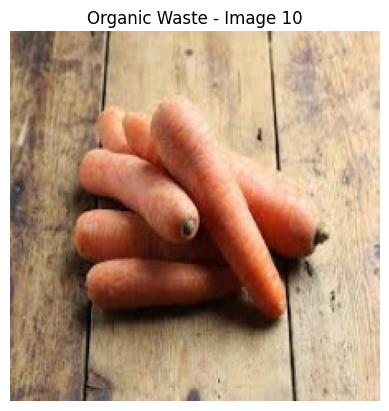

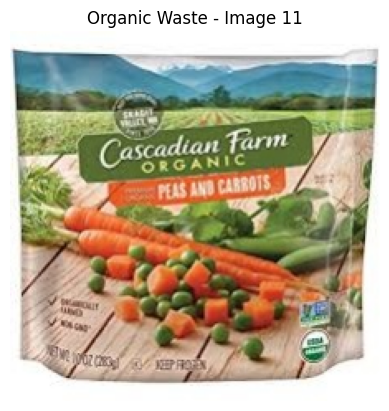

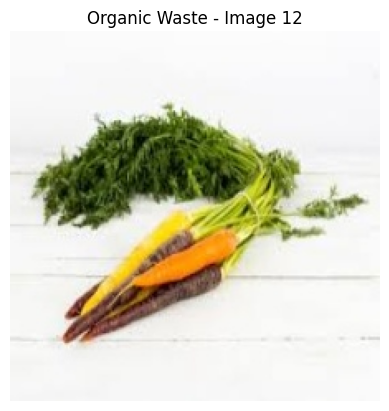

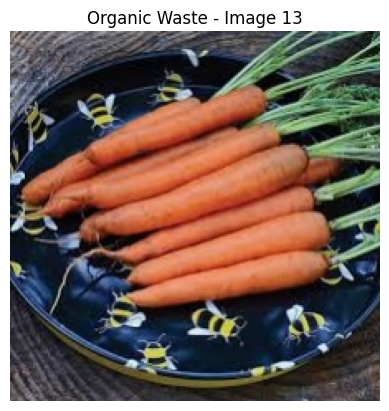

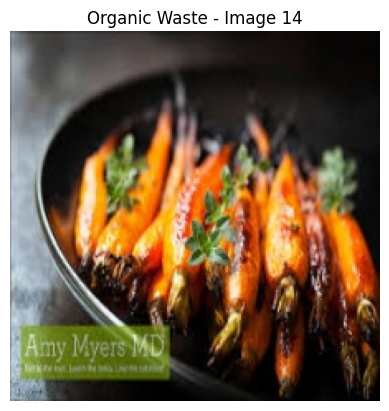

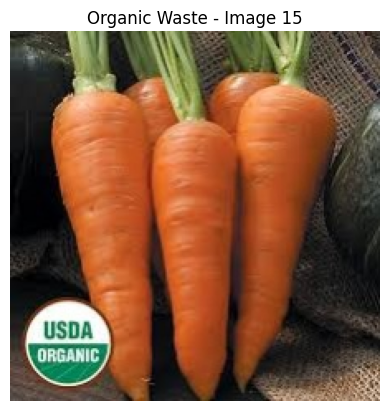

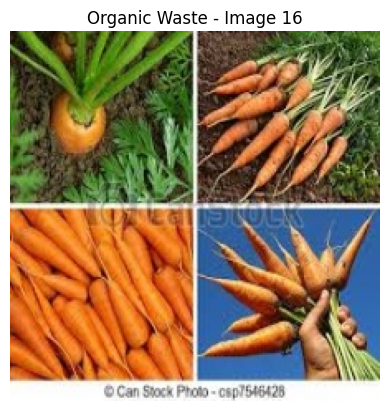

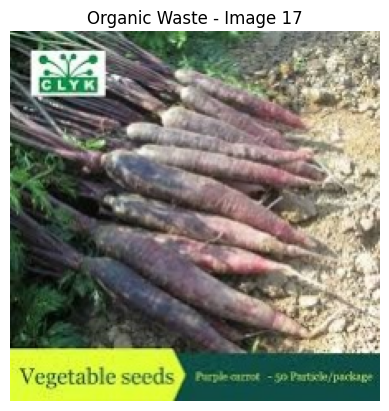

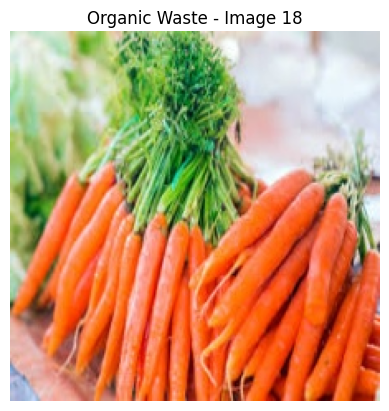

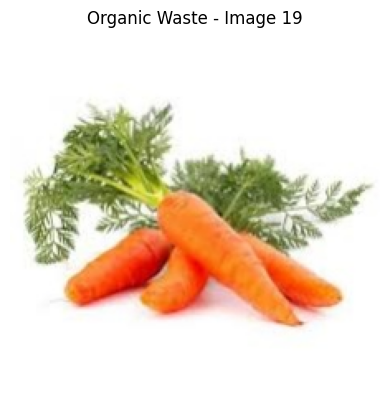

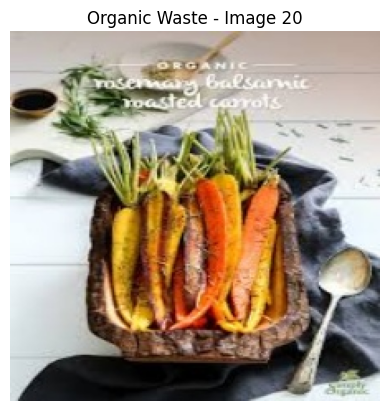

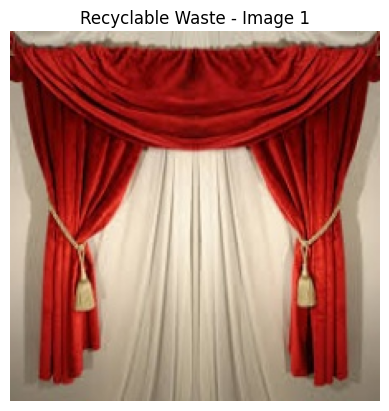

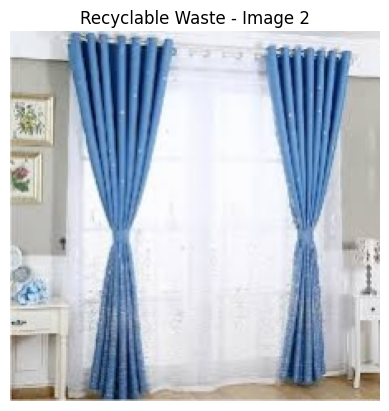

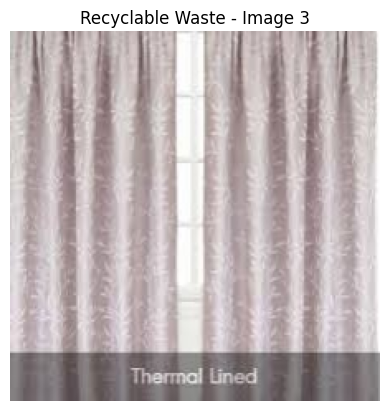

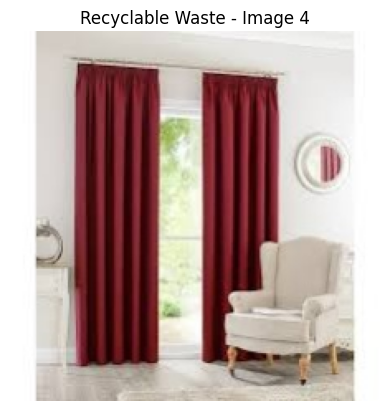

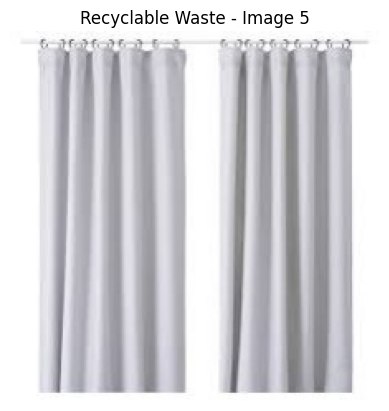

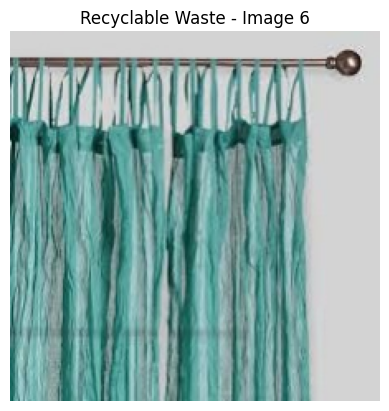

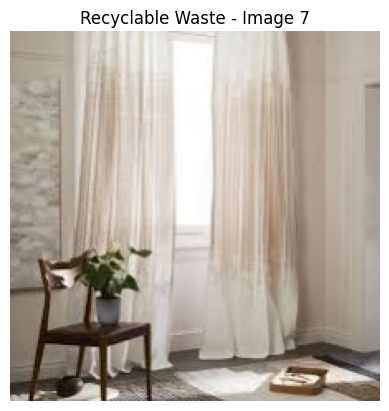

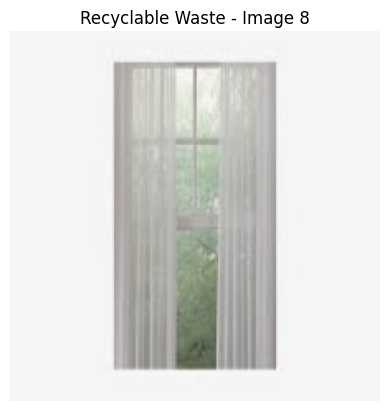

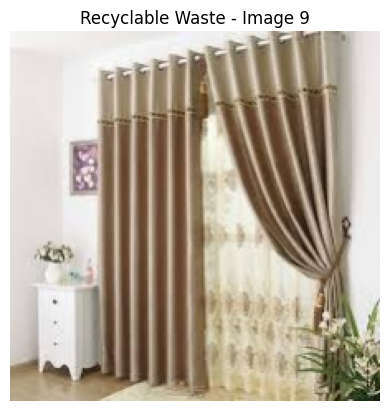

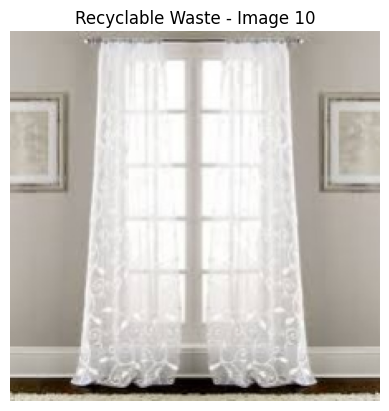

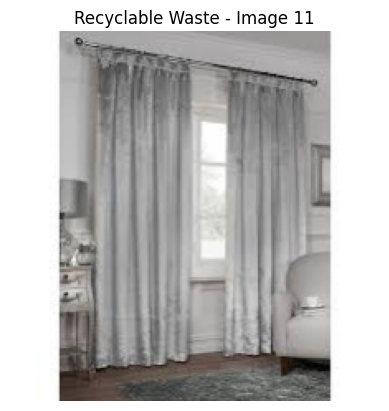

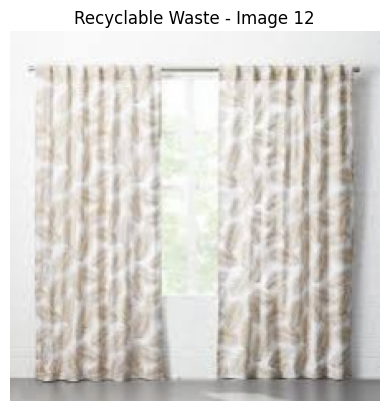

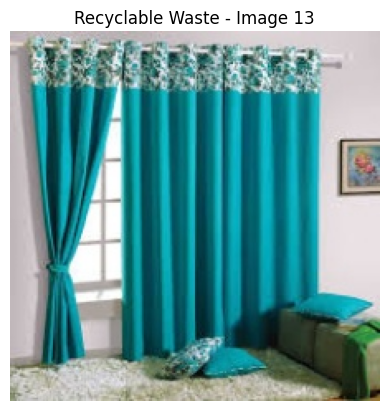

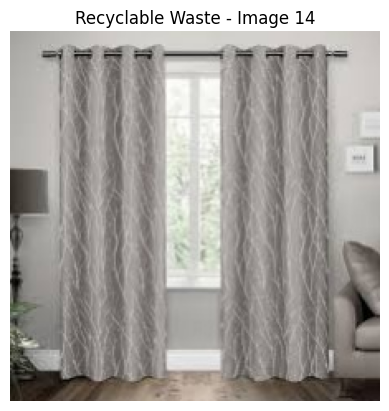

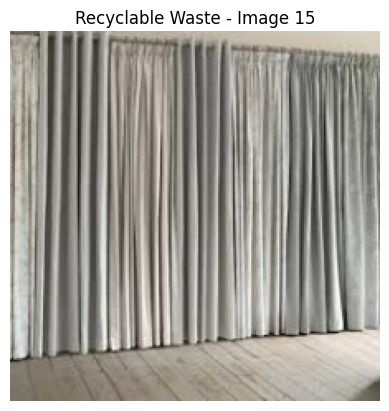

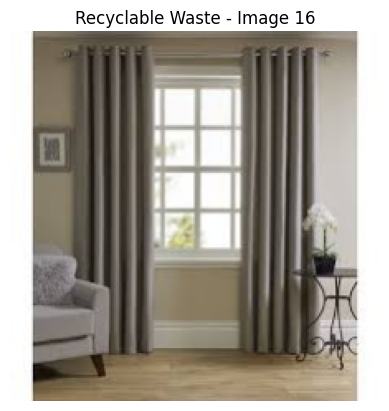

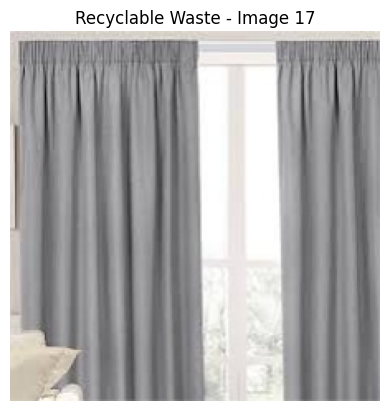

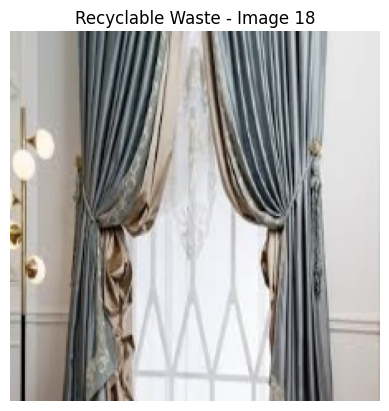

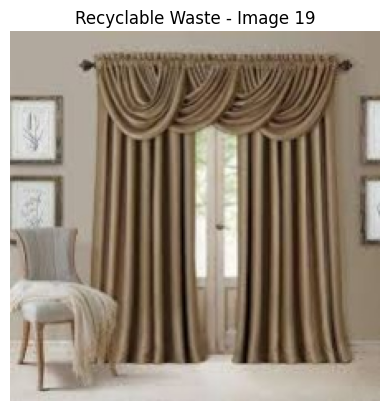

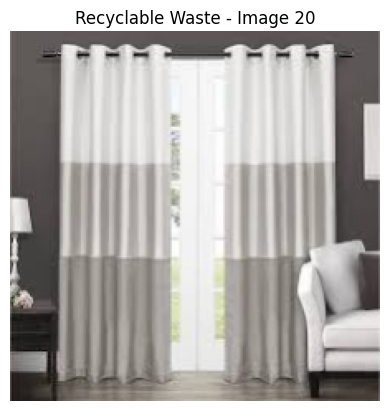

In [1]:
import cv2
import matplotlib.pyplot as plt
import os

# Function to display an image
def show_image(image_path, title):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct colors
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")
    plt.show()

# Paths for test dataset
test_organic_path = "./preprocessed/test/O"
test_recyclable_path = "./preprocessed/test/R"

# Get image filenames from the directories
test_organic_images = os.listdir(test_organic_path) if os.path.exists(test_organic_path) else []
test_recyclable_images = os.listdir(test_recyclable_path) if os.path.exists(test_recyclable_path) else []

# Display first 10 images from each category (if available)
def show_multiple_images(images, title):
    for i, image_name in enumerate(images[:20]):  # Display first 10 images
        image_path = os.path.join(test_organic_path if title == "Organic Waste" else test_recyclable_path, image_name)
        show_image(image_path, f"{title} - Image {i + 1}")

if test_organic_images:
    show_multiple_images(test_organic_images, "Organic Waste")
else:
    print("No Organic images found in the test set!")

if test_recyclable_images:
    show_multiple_images(test_recyclable_images, "Recyclable Waste")
else:
    print("No Recyclable images found in the test set!")


In [8]:
import tensorflow as tf

In [2]:
print("Test Generator Exists:", 'test_generator' in locals() or 'test_generator' in globals())


Test Generator Exists: False


In [7]:
!python --version


Python 3.11.2


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_path = './preprocessed/test'

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important: Ensure order is maintained for correct evaluation
)


ImportError: Traceback (most recent call last):
  File "C:\Users\Swapnil\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

##### 